In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New folder/Datasets/Train'
valid_path = '/content/drive/MyDrive/New folder/Datasets/Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/New folder/Datasets/Train/*')

In [8]:
folders

['/content/drive/MyDrive/New folder/Datasets/Train/audi',
 '/content/drive/MyDrive/New folder/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/New folder/Datasets/Train/mercedes']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New folder/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New folder/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 37s 19s/step - loss: 7.1245 - accuracy: 0.3438 - val_loss: 3.9111 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 371ms/step - loss: 4.6364 - accuracy: 0.3906 - val_loss: 6.0884 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 363ms/step - loss: 9.5359 - accuracy: 0.3906 - val_loss: 4.6486 - val_accuracy: 0.3448
Epoch 4/50
2/2 [==============================] - 1s 366ms/step - loss: 8.0681 - accuracy: 0.4531 - val_loss: 4.6422 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 1s 364ms/step - loss: 5.0054 - accuracy: 0.4219 - val_loss: 1.6325 - val_accuracy: 0.3621
Epoch 6/50
2/2 [==============================] - 1s 359ms/step - loss: 2.9186 - accuracy: 0.4062 - val_loss: 8.4082 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 359ms/step - loss: 4.9805 - accu

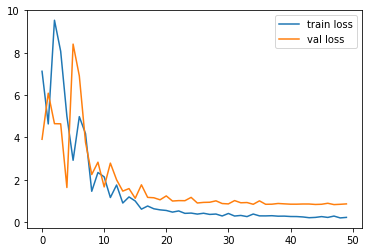

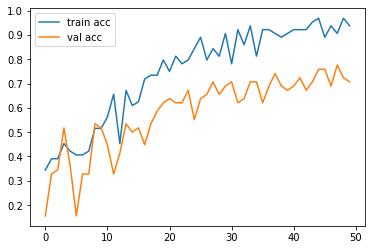

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/New folder/Datasets/model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[1.84660312e-02, 5.90722144e-01, 3.90811741e-01],
       [2.07756925e-02, 9.34814692e-01, 4.44096625e-02],
       [9.59363580e-02, 2.96197087e-01, 6.07866526e-01],
       [8.01193938e-02, 1.24040414e-02, 9.07476544e-01],
       [3.60046444e-03, 9.88413155e-01, 7.98632577e-03],
       [2.23435760e-02, 4.39413428e-01, 5.38242996e-01],
       [4.62636985e-02, 8.44714139e-03, 9.45289195e-01],
       [1.77225292e-01, 5.16559362e-01, 3.06215376e-01],
       [3.94626446e-02, 4.69522327e-01, 4.91014987e-01],
       [1.10823192e-01, 2.36540988e-01, 6.52635872e-01],
       [9.71490238e-03, 9.26979542e-01, 6.33054897e-02],
       [8.67876351e-01, 1.29265293e-01, 2.85835448e-03],
       [1.51490634e-02, 9.83617544e-01, 1.23344967e-03],
       [3.22658122e-02, 4.96214837e-01, 4.71519381e-01],
       [8.32102299e-02, 3.93851578e-01, 5.22938251e-01],
       [3.67673188e-01, 4.01311778e-02, 5.92195630e-01],
       [3.82077768e-02, 7.73998499e-02, 8.84392321e-01],
       [1.68673433e-02, 8.93927

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('/content/drive/MyDrive/New folder/Datasets/model_resnet50.h5')

In [58]:
img=image.load_img('/content/drive/MyDrive/New folder/Datasets/Test/audi/29.jpg',target_size=(224,224))

In [59]:
x=image.img_to_array(img)
x

array([[[ 64.,  64.,  72.],
        [ 36.,  36.,  44.],
        [ 39.,  39.,  47.],
        ...,
        [200., 206., 220.],
        [200., 206., 220.],
        [200., 206., 220.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       ...,

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[170., 173., 178.],
        [168., 171., 176.],
        [166., 1

In [60]:
x.shape

(224, 224, 3)

In [61]:
x=x/255

In [62]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [63]:
model.predict(img_data)

array([[0.27952394, 0.2906093 , 0.4298668 ]], dtype=float32)

In [64]:
a=np.argmax(model.predict(img_data), axis=1)

In [65]:
a

array([2])